## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,normalize

## Reading train and test dataset

In [2]:
df_train = pd.read_csv('./Datasets/train.csv')
df_test = pd.read_csv('./Datasets/test.csv')

In [3]:
df_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,245280,-999.000,75.819,60.247,4.272,-999.0,-999.0,-999.0,2.215,4.272,...,0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,4.683036,b
1,262684,48.837,42.561,38.599,52.000,-999.0,-999.0,-999.0,1.286,2.032,...,1,50.286,1.964,0.240,-999.0,-999.0,-999.0,50.286,2.300551,b
2,297196,109.825,6.630,81.085,39.622,-999.0,-999.0,-999.0,3.192,39.622,...,0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,0.018636,s
3,195128,132.732,72.906,124.927,1.844,-999.0,-999.0,-999.0,3.397,1.844,...,0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,6.646627,b
4,202281,105.644,49.158,67.312,45.836,-999.0,-999.0,-999.0,2.586,5.066,...,1,41.824,-1.028,1.379,-999.0,-999.0,-999.0,41.824,1.454848,b


In [4]:
print("Train dataset: ",df_train.shape)
print("Test dataset: ",df_test.shape)

#drop the weights column from train dataset
df_train = df_train.drop(['Weight'],axis=1)
df_test = df_test.drop(['Weight'],axis=1)

Train dataset:  (200000, 33)
Test dataset:  (50000, 33)


## Analysing Target column

b    131456
s     68544
Name: Label, dtype: int64


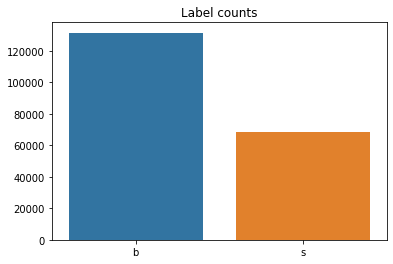

In [5]:
print(df_train['Label'].value_counts())
sns.barplot(x = df_train['Label'].value_counts().index, y = df_train['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

## Data preprocessing

### Label encoding

In [6]:
label_encoder = LabelEncoder()
df_train['Label'] = label_encoder.fit_transform(df_train.Label)
df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,211669,104.013,30.973,72.342,107.323,6.674,1392.127,-11.131,1.850,18.230,...,279.175,2,51.011,3.397,1.594,48.108,-3.276,0.957,99.119,1
1,145120,99.254,40.244,72.411,22.628,-999.000,-999.000,-999.000,3.216,22.628,...,75.963,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
2,275536,245.059,33.030,200.144,26.154,-999.000,-999.000,-999.000,3.003,26.154,...,208.793,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
3,292423,154.865,41.603,106.340,65.308,-999.000,-999.000,-999.000,2.963,34.115,...,244.856,1,84.492,-0.779,0.113,-999.000,-999.000,-999.000,84.492,0
4,119532,97.242,62.288,73.844,32.605,-999.000,-999.000,-999.000,3.236,32.605,...,118.445,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1


In [7]:
Y_train = df_train['Label']
X_train = df_train.drop(['Label'],axis=1)
Y_test = df_test['Label']
X_test = df_test.drop(['Label'],axis=1)

#setting index as eventid
X_train.set_index(['EventId'],inplace = True)
X_test.set_index(['EventId'],inplace = True)

In [8]:
X_train = X_train.replace(-999.000,np.nan)
X_test = X_test.replace(-999.000,np.nan)
X_train.head()
X_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
245280,NaN,75.819,60.247,4.272,NaN,NaN,NaN,2.215,4.272,67.641,...,2.965,111.755,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
262684,48.837,42.561,38.599,52.000,NaN,NaN,NaN,1.286,2.032,116.488,...,1.516,118.492,1,50.286,1.964,0.240,NaN,NaN,NaN,50.286
297196,109.825,6.630,81.085,39.622,NaN,NaN,NaN,3.192,39.622,69.950,...,2.910,201.376,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
195128,132.732,72.906,124.927,1.844,NaN,NaN,NaN,3.397,1.844,62.453,...,2.235,100.692,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
202281,105.644,49.158,67.312,45.836,NaN,NaN,NaN,2.586,5.066,110.162,...,-2.098,226.477,1,41.824,-1.028,1.379,NaN,NaN,NaN,41.824


In [9]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

X_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
245280,121.427046,75.819,60.247,4.272,2.395949,372.132373,-0.818362,2.215,4.272,67.641,...,2.965,111.755,0,85.083091,0.003837,-0.013142,57.763971,0.004014,-0.000645,0.000
262684,48.837000,42.561,38.599,52.000,2.395949,372.132373,-0.818362,1.286,2.032,116.488,...,1.516,118.492,1,50.286000,1.964000,0.240000,57.763971,0.004014,-0.000645,50.286
297196,109.825000,6.630,81.085,39.622,2.395949,372.132373,-0.818362,3.192,39.622,69.950,...,2.910,201.376,0,85.083091,0.003837,-0.013142,57.763971,0.004014,-0.000645,0.000
195128,132.732000,72.906,124.927,1.844,2.395949,372.132373,-0.818362,3.397,1.844,62.453,...,2.235,100.692,0,85.083091,0.003837,-0.013142,57.763971,0.004014,-0.000645,0.000
202281,105.644000,49.158,67.312,45.836,2.395949,372.132373,-0.818362,2.586,5.066,110.162,...,-2.098,226.477,1,41.824000,-1.028000,1.379000,57.763971,0.004014,-0.000645,41.824


## Normalizing the data

In [10]:

X_train = normalize(X_train)
X_test = normalize(X_test)

In [11]:
#K Fold Cross Validation

from sklearn.model_selection import KFold


kf = KFold(n_splits=5, random_state=619, shuffle=True)

for train_index, val_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", val_index)
    xtrain, xvalid = X_train[train_index], X_train[val_index]

    ytrain, yvalid = Y_train[train_index], Y_train[val_index]

TRAIN: [     0      2      3 ... 199996 199997 199998] TEST: [     1      5      9 ... 199986 199989 199999]
TRAIN: [     0      1      4 ... 199994 199996 199999] TEST: [     2      3     10 ... 199995 199997 199998]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [    21     24     26 ... 199987 199992 199994]
TRAIN: [     1      2      3 ... 199997 199998 199999] TEST: [     0      6      7 ... 199978 199983 199996]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [     4     22     23 ... 199985 199988 199990]


In [12]:
print(xtrain.shape)
print(ytrain.shape)
print(xvalid.shape)
print(yvalid.shape)

(160000, 30)
(160000,)
(40000, 30)
(40000,)


In [13]:
#reshape for rnn

X_train = xtrain.reshape(-1, 1, 30)
X_val  = xvalid.reshape(-1, 1, 30)
y_train = ytrain.values #convert pd to array
y_train = y_train.reshape(-1, 1,)
y_val = yvalid.values #convert pd to array
y_val = y_val.reshape(-1, 1,)



In [14]:
X_train.shape

(160000, 1, 30)

In [16]:
from tensorflow.keras.layers import Conv2D,LSTM,LeakyReLU, MaxPooling2D,Concatenate,Input, Dropout, Flatten, Dense, GlobalAveragePooling2D,Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Model


  # create model
    

#input 
input_layer = Input(shape=(1,30))
main_rnn_layer = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(input_layer)

    
#output
rnn = LSTM(32)(main_rnn_layer)
dense = Dense(128)(rnn)
dropout_c = Dropout(0.3)(dense)
Activation = LeakyReLU(alpha=0.1)(dropout_c)
classes = Dense(1,name="class")(Activation)

model = Model(input_layer, classes)

# Compile model
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='higgs.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError(),tf.keras.losses.MeanSquaredLogarithmicError()], optimizer="adam")


model.summary()
# Fit the model
history = model.fit(X_train, y_train, 
          epochs = 250, 
          batch_size = 16, 
          validation_data=(X_val,  y_val), 
          callbacks=callbacks)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 30)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 64)             24320     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
class (Dense)                (None, 1)                 129 

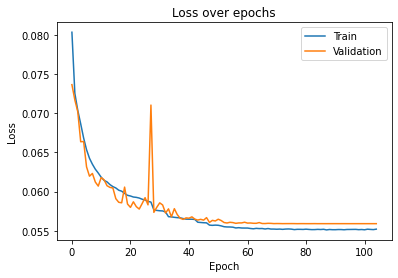

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [18]:
X_test.shape

(50000, 30)

In [19]:
model.load_weights("higgs.h5")

test = X_test #convert pd to array
test = test.reshape(-1, 1,30)


predictions = model.predict(test)

In [20]:
print(predictions.shape)
print(predictions)

(50000, 1)
[[-0.00678288]
 [-0.06087816]
 [ 0.7602465 ]
 ...
 [ 0.6941203 ]
 [ 0.17027777]
 [ 0.18175305]]


In [21]:
pred = np.where(predictions > 0.5, 1, 0)
pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [22]:
test_predict = pd.Series(pred[:,0])
test_predict

0        0
1        0
2        1
3        0
4        0
        ..
49995    0
49996    1
49997    1
49998    0
49999    0
Length: 50000, dtype: int64

In [23]:
test_predict = test_predict.replace(1,'s')
test_predict = test_predict.replace(0,'b')
test_predict

0        b
1        b
2        s
3        b
4        b
        ..
49995    b
49996    s
49997    s
49998    b
49999    b
Length: 50000, dtype: object

In [24]:
y_pred = test_predict.iloc[:]

In [25]:
y_pred

0        b
1        b
2        s
3        b
4        b
        ..
49995    b
49996    s
49997    s
49998    b
49999    b
Length: 50000, dtype: object

In [26]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(Y_test, y_pred))

0.83278
